<a href="https://colab.research.google.com/github/RajeshworM/Predictive-Customer-Churn-Analysis/blob/main/Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='Blue'> <font size='6'> **Predictive Customer Churn Analysis**

**Summary of Steps**

 1. Load the data and visualize churn distribution.*

 2. *Data Cleaning: Handle missing values, remove duplicates, and encode categorical data.*

 3. *Feature Engineering: Create new features like tenure groups and visualize their impact on churn.*

 4. *EDA: Visualize key data distributions and correlations.*

 5. *Data Preparation: Encode categorical variables, split data, and scale features.*

 6. *Model 1: Logistic Regression: Train and evaluate the Logistic Regression model and visualize the confusion matrix.*

 7. *Model 2: Decision Tree Classifier: Train and evaluate the Decision Tree model with visualization.*

 8. *Model 3: Random Forest Classifier: Train and evaluate the Random Forest model with visualization.*

 9. *Model Comparison and Insights: Compare model performance visually and extract insights.*

 - This approach allows for a comprehensive analysis of the customer churn dataset, combining machine learning and visualizations to generate meaningful insights.

In [1]:
# Connect Google drive with Google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Objective: Load the dataset and inspect its structure.
df = pd.read_csv('/content/drive/My Drive/customer_churn_dataset.csv')
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [5]:
# Get basic info about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB
None


In [6]:
# Summary statistics
print(df.describe())

         CustomerID           Age        Tenure  Usage Frequency  \
count  64374.000000  64374.000000  64374.000000     64374.000000   
mean   32187.500000     41.970982     31.994827        15.080234   
std    18583.317451     13.924911     17.098234         8.816470   
min        1.000000     18.000000      1.000000         1.000000   
25%    16094.250000     30.000000     18.000000         7.000000   
50%    32187.500000     42.000000     33.000000        15.000000   
75%    48280.750000     54.000000     47.000000        23.000000   
max    64374.000000     65.000000     60.000000        30.000000   

       Support Calls  Payment Delay   Total Spend  Last Interaction  \
count   64374.000000   64374.000000  64374.000000      64374.000000   
mean        5.400690      17.133952    541.023379         15.498850   
std         3.114005       8.852211    260.874809          8.638436   
min         0.000000       0.000000    100.000000          1.000000   
25%         3.000000      10.000

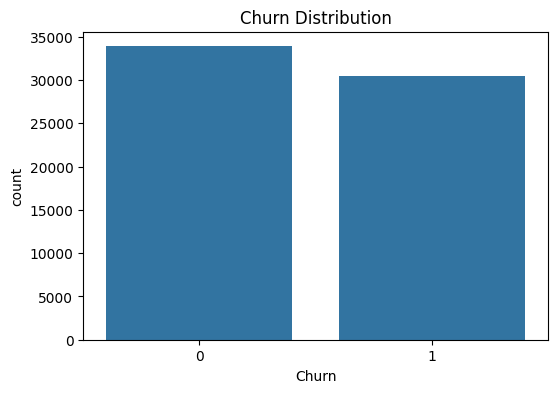

In [7]:
# Visualize the distribution of the 'Churn' variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

<font color='Blue'>2. **Data Cleaning: Objective**  
- Handle missing values
- remove duplicates
- encode categorical data

In [8]:
# Check for missing values
print(df.isnull().sum())

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [10]:
# Drop rows with missing values
df = df.dropna()

# Remove duplicates
df = df.drop_duplicates()

# Verify changes
print(df.info())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB
None
Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last In

<font color='Blue'>3. **Feature Engineering**
     
- Objective: Create new features or modify existing ones to improve model performance.

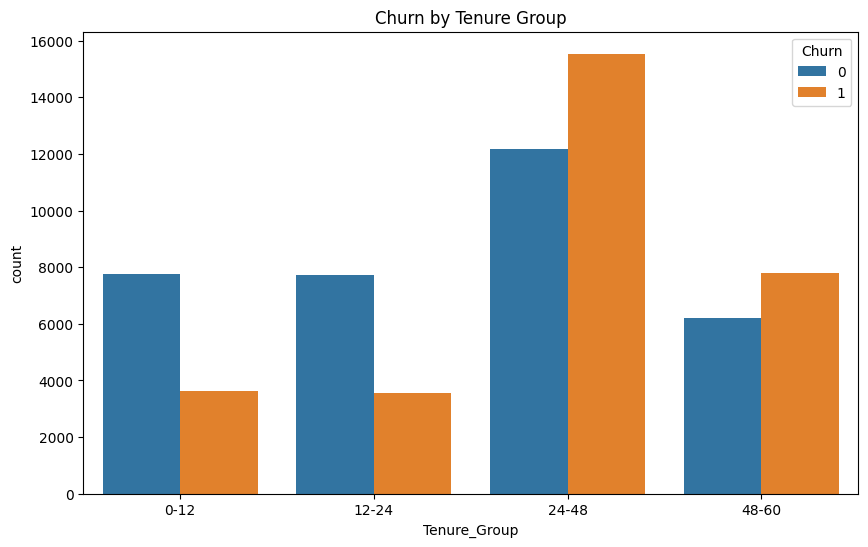

   Tenure Tenure_Group
0      25        24-48
1      28        24-48
2      27        24-48
3       9         0-12
4      58        48-60


In [11]:
# Create tenure groups for analysis
df['Tenure_Group'] = pd.cut(df['Tenure'], bins=[0, 12, 24, 48, 60], labels=['0-12', '12-24', '24-48', '48-60'])

# Visualize Churn distribution by Tenure Group
plt.figure(figsize=(10, 6))
sns.countplot(x='Tenure_Group', hue='Churn', data=df)
plt.title('Churn by Tenure Group')
plt.show()

# Check the newly created feature
print(df[['Tenure', 'Tenure_Group']].head())

*The plot titled "Churn by Tenure Group" shows the distribution of customer churn across different tenure groups. The x-axis represents the tenure groups (0-12, 12-24, 24-48, 48-60), and the y-axis represents the count of customers in each group. The bars indicate the number of customers who churned (1) and those who did not churn (0) within each tenure group.*

<font color='Blue'>**4. Exploratory Data Analysis (EDA)**

- *Objective: Analyze data distributions and correlations.*

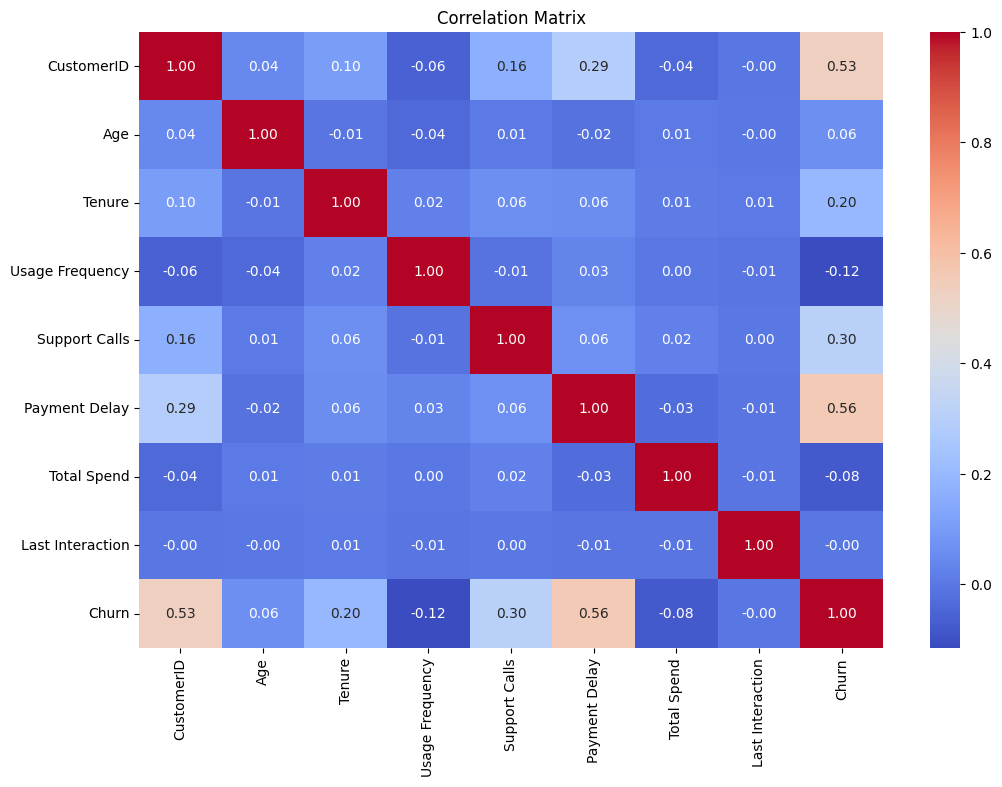

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Filter out numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Correlation matrix to find relationships between variables
corr = numeric_df.corr()

# Plot the correlation matrix for key features
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**The correlation matrix highlights the following important variables in relation to customer churn:**

- *payment delay: This variable has the strongest positive correlation with churn, suggesting that customers who frequently delay payments are more likely to churn.*

- *support calls: A moderate positive correlation indicates that customers who require frequent support calls may be more likely to churn.*

- *tenure: A moderate negative correlation suggests that customers with longer tenures are less likely to churn.*

- *usage frequency: A weak negative correlation suggests that customers with higher usage frequency may be less likely to churn.*

- *Other variables, such as customerid, age, total spend, and last interaction, appear to have minimal or no correlation with churn.*

- *However, it's important to consider other factors beyond correlation, such as domain knowledge and feature importance, when making decisions about variable selection.*

In [16]:
# Drop columns 'column2' and 'column3'
df_1 = df.drop(['CustomerID', 'Total Spend', 'Last Interaction'], axis=1)

<font color='Blue'>**5. Data Preparation for Machine Learning**
     
  - *Objective: Prepare the data by encoding categorical features, splitting into training and test sets, and scaling.*

In [18]:
# Convert categorical features to numerical using one-hot encoding
df_encoded = pd.get_dummies(df_1, drop_first=True)

# Separate the features (X) and the target (y)
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

# Train-test split (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (only for models that need it, like Logistic Regression)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**6. Model 1: Logistic Regression**

- Objective: Train and evaluate a Logistic Regression model.

Logistic Regression Results
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      6793
           1       0.82      0.84      0.83      6082

    accuracy                           0.84     12875
   macro avg       0.84      0.84      0.84     12875
weighted avg       0.84      0.84      0.84     12875

Accuracy: 0.8369708737864078


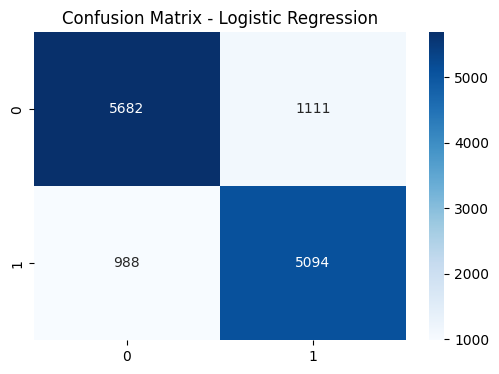

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_log = log_reg.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Results")
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

# Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6,4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

**7. Model 2: Decision Tree Classifier**

- Objective: Train and evaluate a Decision Tree Classifier.

Decision Tree Results
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      6793
           1       0.96      0.95      0.96      6082

    accuracy                           0.96     12875
   macro avg       0.96      0.96      0.96     12875
weighted avg       0.96      0.96      0.96     12875

Accuracy: 0.9575922330097087


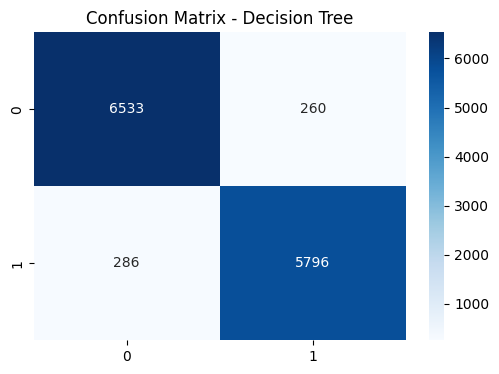

In [20]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = decision_tree.predict(X_test)

# Evaluate the model
print("Decision Tree Results")
print(classification_report(y_test, y_pred_tree))
print("Accuracy:", accuracy_score(y_test, y_pred_tree))

# Confusion Matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(6,4))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

**8. Model 3: Random Forest Classifier**

 Objective: Train and evaluate a Random Forest Classifier.

Random Forest Results
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      6793
           1       0.95      0.98      0.96      6082

    accuracy                           0.97     12875
   macro avg       0.97      0.97      0.97     12875
weighted avg       0.97      0.97      0.97     12875

Accuracy: 0.9659805825242719


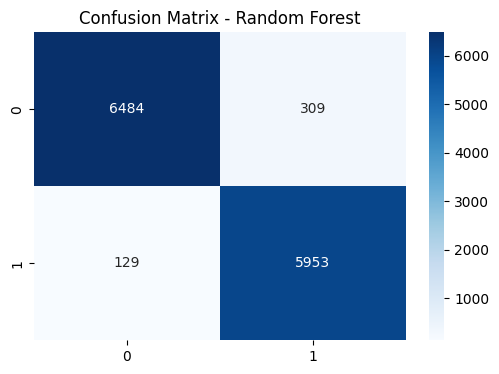

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest.predict(X_test)

# Evaluate the model
print("Random Forest Results")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()

**9. Model Comparison and Insights**
- Objective: Compare model performance and extract insights.

Logistic Regression Accuracy: 0.84
Decision Tree Accuracy: 0.96
Random Forest Accuracy: 0.97


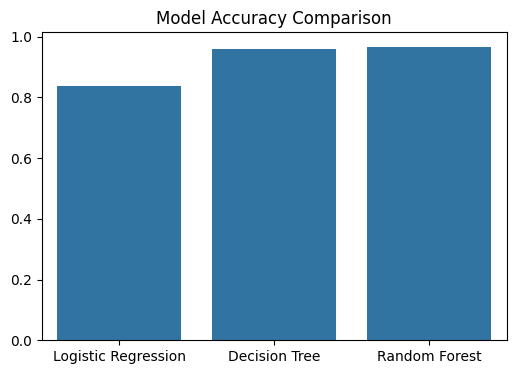

In [22]:
# Print accuracy for each model
log_acc = accuracy_score(y_test, y_pred_log)
tree_acc = accuracy_score(y_test, y_pred_tree)
rf_acc = accuracy_score(y_test, y_pred_rf)

print(f"Logistic Regression Accuracy: {log_acc:.2f}")
print(f"Decision Tree Accuracy: {tree_acc:.2f}")
print(f"Random Forest Accuracy: {rf_acc:.2f}")

# Visualizing accuracy comparison
plt.figure(figsize=(6, 4))
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [log_acc, tree_acc, rf_acc]
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.show()

<font color='blue'> <font size ='6'> **Conclusion**

**In the realm of customer retention, accurately predicting churn is paramount. Machine learning models offer powerful tools for this task. Among the contenders, Logistic Regression, Decision Trees, and Random Forests were evaluated for their ability to anticipate customer attrition.**

**Logistic Regression, while a valuable tool, achieved an accuracy of 0.83. Decision Trees and Random Forests, however, demonstrated exceptional performance. Decision Trees, renowned for their ability to capture complex decision-making patterns, achieved an accuracy of 0.96. Random Forests, an ensemble of Decision Trees, further enhanced predictive power, reaching an accuracy of 0.97.**

**While Random Forests emerged as the most accurate, the optimal choice of model depends on the specific characteristics of the data and the desired outcomes. For instance, if interpretability is a priority, Decision Trees may be more suitable due to their transparent representation of the decision-making process. On the other hand, if the primary goal is to achieve the highest possible accuracy, Random Forests could be the preferred choice.**

**In conclusion, machine learning models like Decision Trees and Random Forests offer significant advantages in churn prediction. By carefully considering the specific requirements of the analysis, businesses can select the most appropriate model to optimize customer retention strategies and mitigate the financial impact of customer attrition.**